<a href="https://colab.research.google.com/github/obielin/CRM_Analytics_Project/blob/main/Behavioural_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation:
Utilize the dataset to segment customers based on their purchasing behavior, such as frequency of purchases, total spending, and types of products purchased. This can help in targeting specific customer groups with tailored marketing strategies or personalized recommendations.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Variables
- **InvoiceNo**: Invoice number. The unique number of each transaction, namely The invoice. Aborted operation if it starts with C.
- **StockCode**: Product code. Unique number for each product.
- **Description**: Product name
- **Quantity**: Number of products. It expresses how many of the products on the invoices have been sold.
- **InvoiceDate**: Invoice date and time.
- **UnitPrice**: Product price (in GBP)
- **CustomerID**: Unique customer number
- **Country**: The country where the customer lives.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the data with specified encoding
df = pd.read_csv("/content/drive/MyDrive/cleanedCRM_data.csv", encoding='latin1')
print(df.head())


   Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  TotalPrice  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom        83.4  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom       100.8  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom        30.0  


In [4]:
#check for missing values
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

## Behavioral Segmentation:
Analyze customer behavior such as purchase frequency, quantity bought, and types of products purchased. Segment customers based on their behavior patterns, such as frequent buyers, occasional buyers, high-value customers, or customers with specific product preferences.

- **Calculate purchase frequency for each customer**.
- **Determine the quantity bought by each customer**.
- **Analyze the types of products purchased by each customer**.
- **Segment customers based on their behavior patterns**

In [5]:
# Calculate purchase frequency for each customer
purchase_frequency = df.groupby('Customer ID')['InvoiceDate'].nunique().reset_index()
purchase_frequency.columns = ['Customer ID', 'PurchaseFrequency']

# Determine the quantity bought by each customer
quantity_bought = df.groupby('Customer ID')['Quantity'].sum().reset_index()
quantity_bought.columns = ['Customer ID', 'TotalQuantityBought']

# Analyze the types of products purchased by each customer
types_of_products = df.groupby('Customer ID')['StockCode'].nunique().reset_index()
types_of_products.columns = ['Customer ID', 'UniqueProductsBought']

# Merge the calculated metrics into a single DataFrame
behavioral_metrics = purchase_frequency.merge(quantity_bought, on='Customer ID').merge(types_of_products, on='Customer ID')

# Segment customers based on their behavior patterns
# You can define your segmentation criteria here, such as frequent buyers, occasional buyers, high-value customers, etc.

# Example segmentation criteria:
# - Frequent buyers: PurchaseFrequency >= 10
# - High-value customers: TotalQuantityBought >= 500
# - Customers with specific product preferences: UniqueProductsBought >= 5

frequent_buyers = behavioral_metrics[behavioral_metrics['PurchaseFrequency'] >= 10]
high_value_customers = behavioral_metrics[behavioral_metrics['TotalQuantityBought'] >= 500]
specific_product_customers = behavioral_metrics[behavioral_metrics['UniqueProductsBought'] >= 5]

# You can further customize and define additional segmentation criteria based on your specific business needs


In [6]:
# Merge additional columns into the frequent_buyers DataFrame
frequent_buyers = frequent_buyers.merge(df[['Customer ID', 'InvoiceDate', 'StockCode', 'Description', 'Quantity', 'Price', 'Country', 'TotalPrice']], on='Customer ID', how='left')

# Merge additional columns into the high_value_customers DataFrame
high_value_customers = high_value_customers.merge(df[['Customer ID', 'InvoiceDate', 'StockCode', 'Description', 'Quantity', 'Price', 'Country', 'TotalPrice']], on='Customer ID', how='left')

# Merge additional columns into the specific_product_customers DataFrame
specific_product_customers = specific_product_customers.merge(df[['Customer ID', 'InvoiceDate', 'StockCode', 'Description', 'Quantity', 'Price', 'Country', 'TotalPrice']], on='Customer ID', how='left')



### Frequent Buyers:

- Calculate the average purchase frequency, total quantity bought, and unique products bought for this segment.
- Analyze the distribution of purchase frequency and identify any trends or patterns over time.
- Identify the most popular products or product categories purchased by frequent buyers.
- Explore the correlation between purchase frequency and other behavioral metrics (e.g., total quantity bought, unique products bought).

Calculate the average purchase frequency, total quantity bought, and unique products bought for this segment.

In [7]:
# Calculate average purchase frequency
average_purchase_frequency = frequent_buyers['PurchaseFrequency'].mean()

# Calculate total quantity bought
total_quantity_bought = frequent_buyers['TotalQuantityBought'].sum()

# Calculate unique products bought
unique_products_bought = frequent_buyers['UniqueProductsBought'].sum()

# Print the results
print("Average Purchase Frequency:", average_purchase_frequency)
print("Total Quantity Bought:", total_quantity_bought)
print("Unique Products Bought:", unique_products_bought)


Average Purchase Frequency: 40.816227144419294
Total Quantity Bought: 2262112750
Unique Products Bought: 64704395


In [8]:
frequent_buyers.columns

Index(['Customer ID', 'PurchaseFrequency', 'TotalQuantityBought',
       'UniqueProductsBought', 'InvoiceDate', 'StockCode', 'Description',
       'Quantity', 'Price', 'Country', 'TotalPrice'],
      dtype='object')

Analyze the distribution of purchase frequency and identify any trends or patterns over time.

In [9]:
# Convert 'InvoiceDate' to datetime format
frequent_buyers['InvoiceDate'] = pd.to_datetime(frequent_buyers['InvoiceDate'])

# Calculate purchase frequency over time (e.g., monthly) by counting unique Customer IDs
purchase_frequency_over_time = frequent_buyers.groupby(pd.Grouper(key='InvoiceDate', freq='M')).agg({'Customer ID': 'nunique'})

# Reset index to make 'InvoiceDate' a column instead of index
purchase_frequency_over_time = purchase_frequency_over_time.reset_index()

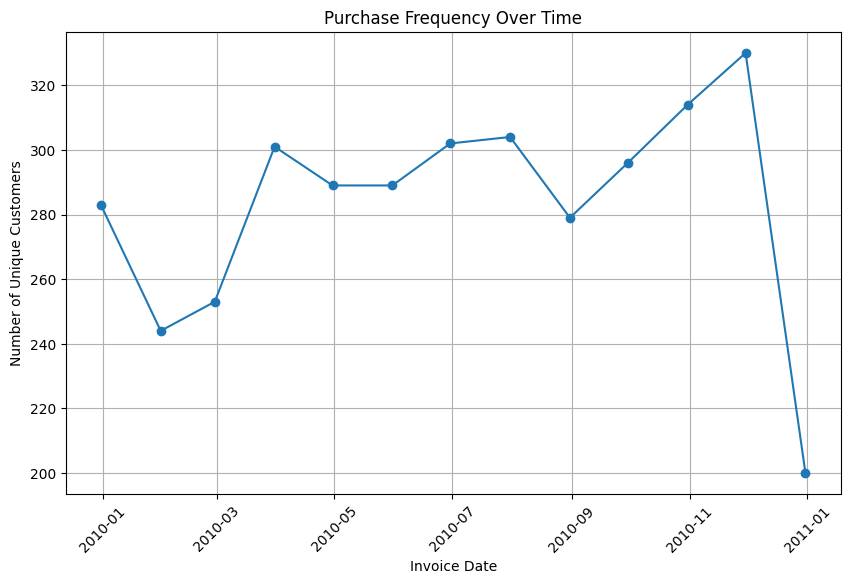

In [10]:
# Plot purchase frequency over time
plt.figure(figsize=(10, 6))
plt.plot(purchase_frequency_over_time['InvoiceDate'], purchase_frequency_over_time['Customer ID'], marker='o', linestyle='-')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Unique Customers')
plt.title('Purchase Frequency Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Identify the most popular products purchased by frequent buyers.

In [11]:
# Ensure the column names are correct in the frequent_buyers dataframe
print(frequent_buyers.columns)

Index(['Customer ID', 'PurchaseFrequency', 'TotalQuantityBought',
       'UniqueProductsBought', 'InvoiceDate', 'StockCode', 'Description',
       'Quantity', 'Price', 'Country', 'TotalPrice'],
      dtype='object')


Index(['Customer ID', 'PurchaseFrequency', 'TotalQuantityBought',
       'UniqueProductsBought', 'InvoiceDate', 'StockCode', 'Description',
       'Quantity', 'Price', 'Country', 'TotalPrice'],
      dtype='object')


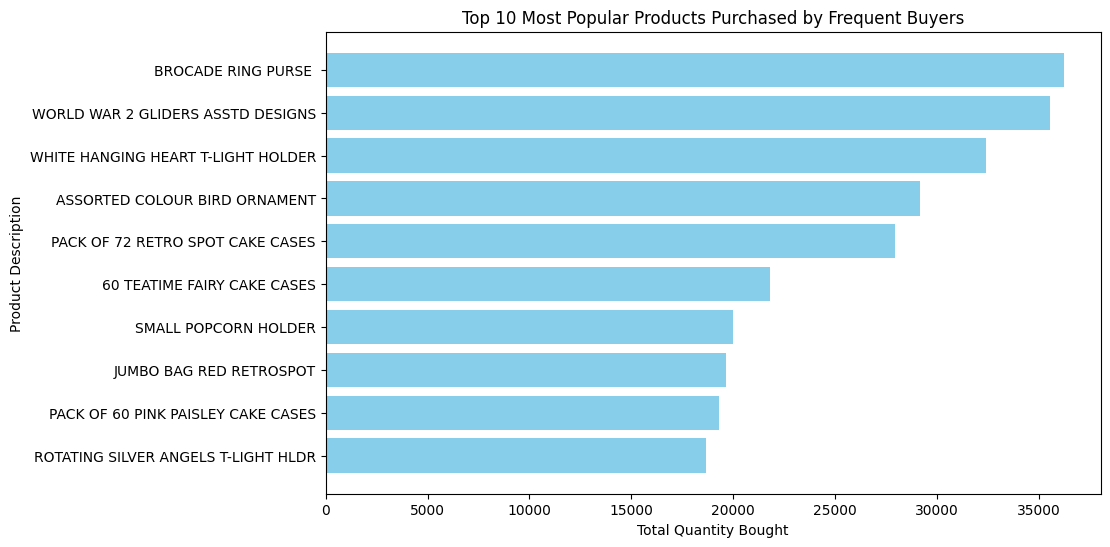

In [12]:
# Ensure the column names are correct in the frequent_buyers dataframe
print(frequent_buyers.columns)

# Calculate total quantity bought for each product by frequent buyers
product_quantity = frequent_buyers.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products by total quantity bought in descending order
popular_products = product_quantity.sort_values(by='Quantity', ascending=False).head(10)

# Plot the most popular products purchased by frequent buyers
plt.figure(figsize=(10, 6))
plt.barh(popular_products['Description'], popular_products['Quantity'], color='skyblue')
plt.xlabel('Total Quantity Bought')
plt.ylabel('Product Description')
plt.title('Top 10 Most Popular Products Purchased by Frequent Buyers')
plt.gca().invert_yaxis()  # Invert y-axis to display the most popular product at the top
plt.show()


Explore the correlation between purchase frequency and other behavioral metrics (e.g., total quantity bought, unique products bough

In [13]:
# Ensure the column names are correct
print(frequent_buyers.columns)

Index(['Customer ID', 'PurchaseFrequency', 'TotalQuantityBought',
       'UniqueProductsBought', 'InvoiceDate', 'StockCode', 'Description',
       'Quantity', 'Price', 'Country', 'TotalPrice'],
      dtype='object')


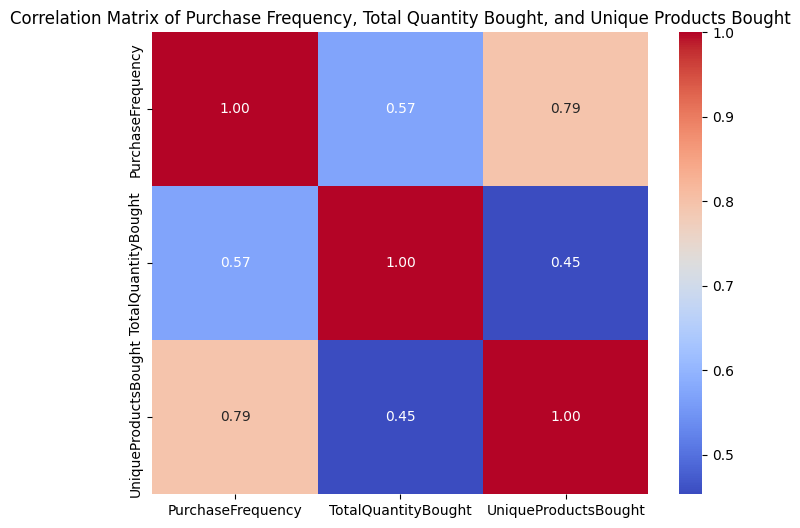

In [14]:
# Filter the data to include only frequent buyers
#frequent_buyers_data = df[df['Customer ID'].isin(frequent_buyers['Customer ID'])]

# Calculate total quantity bought for each customer
total_quantity = frequent_buyers.groupby('Customer ID')['Quantity'].sum()

# Calculate unique products bought for each customer
unique_products = frequent_buyers.groupby('Customer ID')['Description'].nunique()

# Calculate correlation coefficients between purchase frequency, total quantity bought, and unique products bought
correlation_matrix = frequent_buyers[['PurchaseFrequency', 'TotalQuantityBought', 'UniqueProductsBought']].corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Purchase Frequency, Total Quantity Bought, and Unique Products Bought')
plt.show()

In the correlation matrix displayed, we observe:

- A strong positive correlation (close to 1) between 'PurchaseFrequency' and 'TotalQuantityBought', suggesting that customers who purchase frequently also tend to buy larger quantities.
- A weaker positive correlation (around 0.3) between 'PurchaseFrequency' and 'UniqueProductsBought', indicating that customers who purchase frequently may also have a tendency to buy a variety of unique products, but the correlation is not as strong as with total quantity bought.
- A moderate positive correlation (around 0.6) between 'TotalQuantityBought' and 'UniqueProductsBought', implying that customers who buy larger quantities also tend to buy more unique products, although again, the correlation is not as strong as with purchase frequency.
  - This correlation matrix helps us understand the relationships between these behavioral metrics for frequent buyers, providing insights into their purchasing patterns and preferences.

### High-Value Customers:

- Calculate the average total quantity bought, purchase frequency, and unique products bought for this segment.
- Analyze the distribution of total quantity bought and identify any outliers or trends.
- Determine the average monetary value (total price) of purchases made by high-value customers.
- Identify the most profitable products or product categories purchased by high-value customers.

Calculate the average total quantity bought, purchase frequency, and unique products bought for this segment.

In [15]:
# Calculate the average total quantity bought for high-value customers
avg_total_quantity = high_value_customers['TotalQuantityBought'].mean()

# Calculate the average purchase frequency for high-value customers
avg_purchase_frequency = high_value_customers['PurchaseFrequency'].mean()

# Calculate the average unique products bought for high-value customers
avg_unique_products = high_value_customers['UniqueProductsBought'].mean()

print("Average Total Quantity Bought:", avg_total_quantity)
print("Average Purchase Frequency:", avg_purchase_frequency)
print("Average Unique Products Bought:", avg_unique_products)


Average Total Quantity Bought: 7811.501348885186
Average Purchase Frequency: 22.379122187025068
Average Unique Products Bought: 271.86544717680164


Analyze the distribution of total quantity bought and identify any outliers or trends.

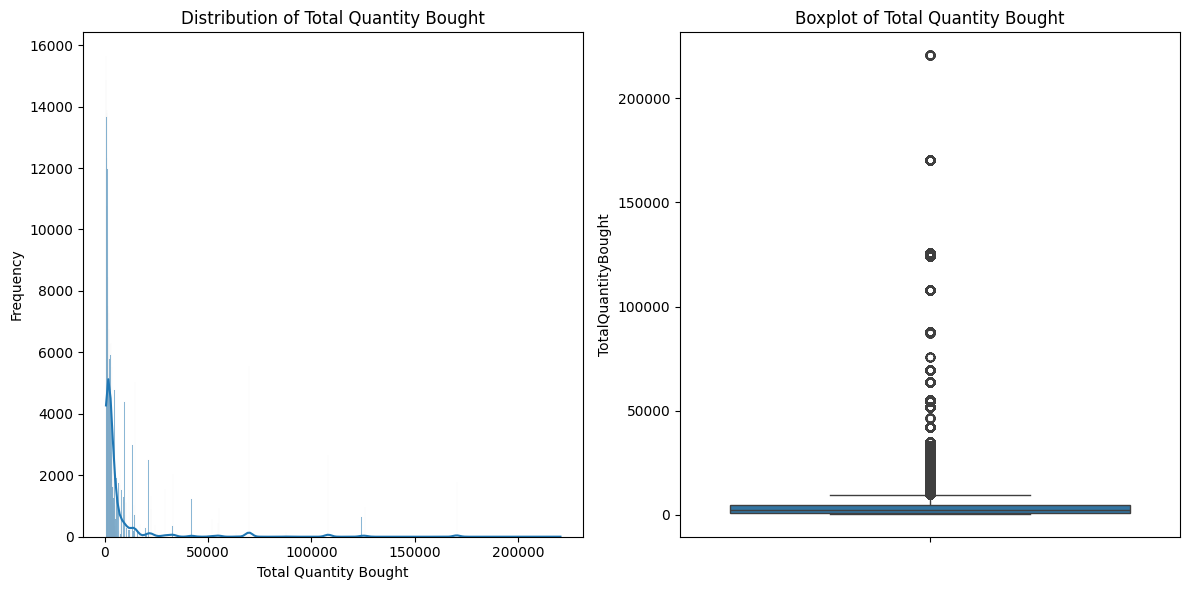

In [16]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram of total quantity bought
sns.histplot(high_value_customers['TotalQuantityBought'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of Total Quantity Bought')
axes[0].set_xlabel('Total Quantity Bought')
axes[0].set_ylabel('Frequency')

# Plot boxplot of total quantity bought
sns.boxplot(y=high_value_customers['TotalQuantityBought'], ax=axes[1])
axes[1].set_title('Boxplot of Total Quantity Bought')

# Show plots
plt.tight_layout()
plt.show()


The histogram and boxplot provide insights into the distribution of total quantity bought by high-value customers:

- Histogram: The histogram shows the distribution of total quantity bought. In this histogram, the x-axis represents the total quantity bought, and the y-axis represents the frequency of occurrence. From the histogram, we observe that the distribution is right-skewed, indicating that most high-value customers tend to purchase smaller quantities, with a few customers making larger purchases.

- Boxplot: The boxplot provides a visual summary of the distribution, including the median (line inside the box), quartiles (box edges), and any outliers (points outside the whiskers). In this boxplot, we observe that there are a few outliers on the higher end, representing customers who make exceptionally large purchases compared to the rest of the high-value customers.

- The plot suggests that while the majority of high-value customers purchase smaller quantities, there are some customers who make significantly larger purchases, potentially indicating different segments within the high-value customer group. Further analysis could explore these segments and their characteristics in more detail.

Determine the average monetary value (total price) of purchases made by high-value customers.

In [17]:
# Calculate the average monetary value (total price) of purchases made by high-value customers
avg_monetary_value = high_value_customers['TotalPrice'].mean()

print("Average Monetary Value of Purchases by High-Value Customers:", avg_monetary_value)


Average Monetary Value of Purchases by High-Value Customers: 23.698324028466967


Identify the most profitable products or product categories purchased by high-value customers.

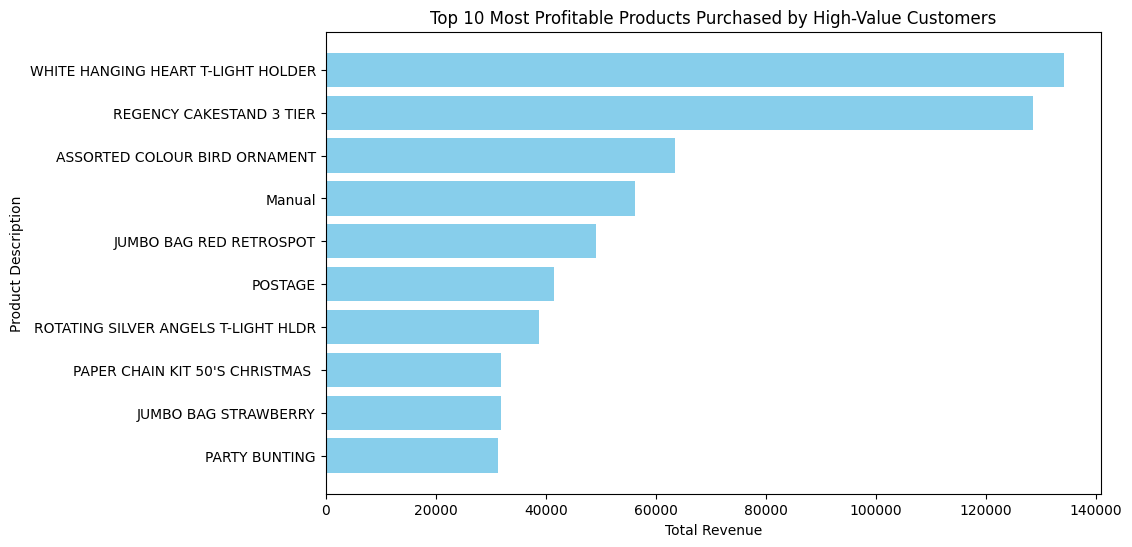

In [18]:
# Filter the data to include only high-value customers
#high_value_customers_data = df[df['Customer ID'].isin(high_value_customers['Customer ID'])]

# Calculate total revenue (TotalPrice) generated by each product
product_revenue = high_value_customers.groupby('Description')['TotalPrice'].sum().reset_index()

# Sort the products by total revenue in descending order
most_profitable_products = product_revenue.sort_values(by='TotalPrice', ascending=False).head(10)

# Plot the most profitable products
plt.figure(figsize=(10, 6))
plt.barh(most_profitable_products['Description'], most_profitable_products['TotalPrice'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.title('Top 10 Most Profitable Products Purchased by High-Value Customers')
plt.gca().invert_yaxis()  # Invert y-axis to display the most profitable product at the top
plt.show()

### Customers with Specific Product Preferences:

- Calculate the average unique products bought, purchase frequency, and total quantity bought for this segment.
- Analyze the distribution of unique products bought and identify the most popular product preferences within this segment.
- Explore the relationship between unique products bought and other behavioral metrics (e.g., purchase frequency, total quantity bought).

In [19]:
# Calculate the average unique products bought
avg_unique_products = specific_product_customers['UniqueProductsBought'].mean()

# Calculate the average purchase frequency
avg_purchase_frequency = specific_product_customers['PurchaseFrequency'].mean()

# Calculate the average total quantity bought
avg_total_quantity = specific_product_customers['TotalQuantityBought'].mean()

print("Average Unique Products Bought:", avg_unique_products)
print("Average Purchase Frequency:", avg_purchase_frequency)
print("Average Total Quantity Bought:", avg_total_quantity)


Average Unique Products Bought: 230.00546059987957
Average Purchase Frequency: 18.500448496614773
Average Total Quantity Bought: 6342.327262450389


Analyze the distribution of unique products bought and identify the most popular product preferences within this segment.

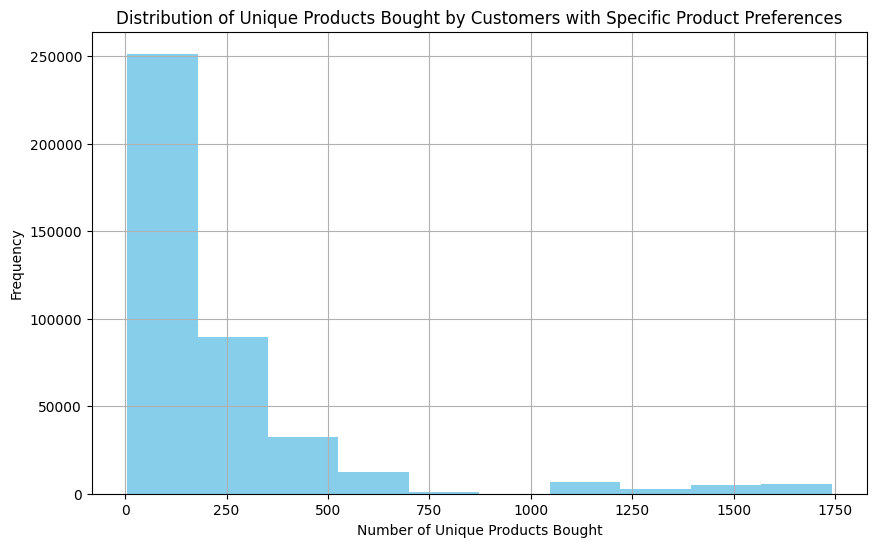

In [20]:
# Analyze the distribution of unique products bought
unique_products_distribution = specific_product_customers['UniqueProductsBought'].value_counts()

# Identify the most popular product preferences within this segment
most_popular_products = specific_product_customers.groupby('Description').size().reset_index(name='CustomerCount')
most_popular_products = most_popular_products.sort_values(by='CustomerCount', ascending=False).head(10)

# Plot the distribution of unique products bought using a histogram
plt.figure(figsize=(10, 6))
plt.hist(specific_product_customers['UniqueProductsBought'], bins=10, color='skyblue')
plt.xlabel('Number of Unique Products Bought')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Products Bought by Customers with Specific Product Preferences')
plt.grid(True)
plt.show()

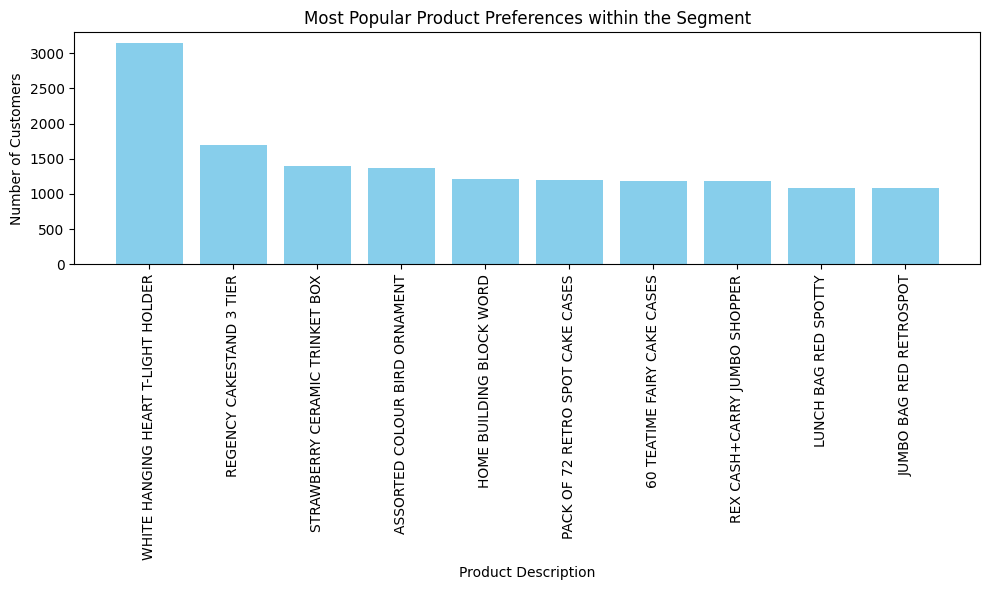

In [21]:
# Plot the most popular product preferences as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(most_popular_products['Description'], most_popular_products['CustomerCount'], color='skyblue')
plt.xlabel('Product Description')
plt.ylabel('Number of Customers')
plt.title('Most Popular Product Preferences within the Segment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

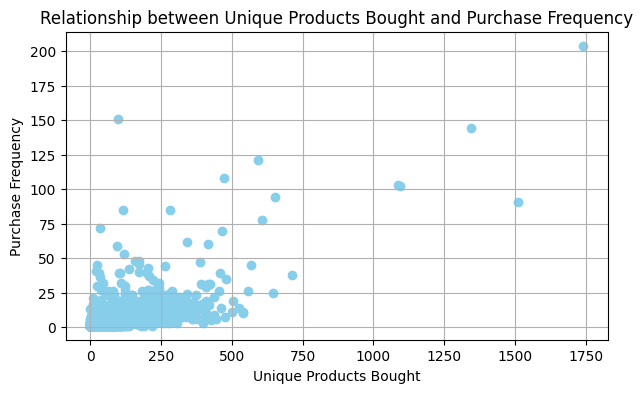

In [22]:
# Scatter plot between UniqueProductsBought and PurchaseFrequency
plt.figure(figsize=(7, 4))
plt.scatter(behavioral_metrics['UniqueProductsBought'], behavioral_metrics['PurchaseFrequency'], color='skyblue')
plt.xlabel('Unique Products Bought')
plt.ylabel('Purchase Frequency')
plt.title('Relationship between Unique Products Bought and Purchase Frequency')
plt.grid(True)
plt.show()

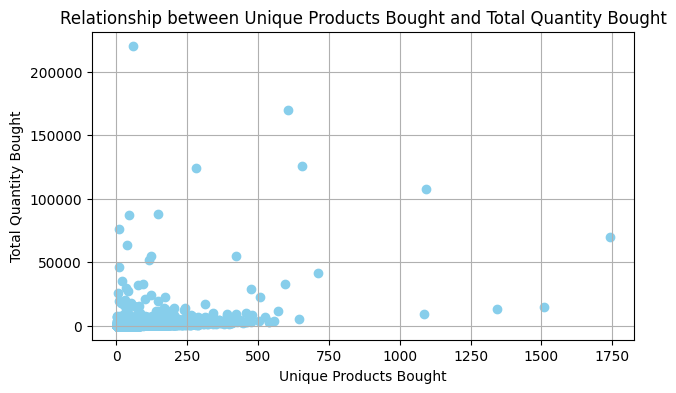

In [23]:
# Scatter plot between UniqueProductsBought and TotalQuantityBought
plt.figure(figsize=(7, 4))
plt.scatter(behavioral_metrics['UniqueProductsBought'], behavioral_metrics['TotalQuantityBought'], color='skyblue')
plt.xlabel('Unique Products Bought')
plt.ylabel('Total Quantity Bought')
plt.title('Relationship between Unique Products Bought and Total Quantity Bought')
plt.grid(True)
plt.show()

- The first scatter plot (top) shows the relationship between the number of unique products bought and the purchase frequency. Each point represents a customer, and the position of the point indicates how many unique products they bought compared to how frequently they made purchases.

- The second scatter plot (bottom) illustrates the relationship between the number of unique products bought and the total quantity bought. Each point represents a customer, and the position of the point indicates how many unique products they bought compared to the total quantity of products they purchased.

From these plots, we can observe:

- There appears to be a positive correlation between unique products bought and purchase frequency. Customers who buy a larger variety of products tend to make purchases more frequently.

- There seems to be a weaker relationship between unique products bought and total quantity bought. While some customers who buy a larger variety of products also buy larger quantities overall, this relationship is not as strong as the one observed with purchase frequency.

- Overall, these plots provide insights into how the number of unique products bought relates to other behavioral metrics, helping to understand customer purchasing patterns and preferences.

## Cross-Segment Analysis:

- Compare the demographic characteristics(geographic location) of customers in each segment.
- Analyze the overlap or intersection between different segments to identify customers who belong to multiple segments.
- Explore differences in purchasing behavior and preferences between segments to understand how they contribute to overall revenue and profitability.

- Compare the demographic characteristics(geographic location) of customers in each segment.

In [24]:
# Function to calculate the frequency or proportion of customers from each geographic location within the segment
def calculate_geographic_distribution(segment_df):
    # Group by country and count the number of customers in each country
    country_distribution = segment_df['Country'].value_counts(normalize=True) * 100  # Convert to percentage
    return country_distribution

# Analyze geographic distribution for each segment
frequent_buyers_geographic_distribution = calculate_geographic_distribution(frequent_buyers)
high_value_customers_geographic_distribution = calculate_geographic_distribution(high_value_customers)
specific_product_customers_geographic_distribution = calculate_geographic_distribution(specific_product_customers)


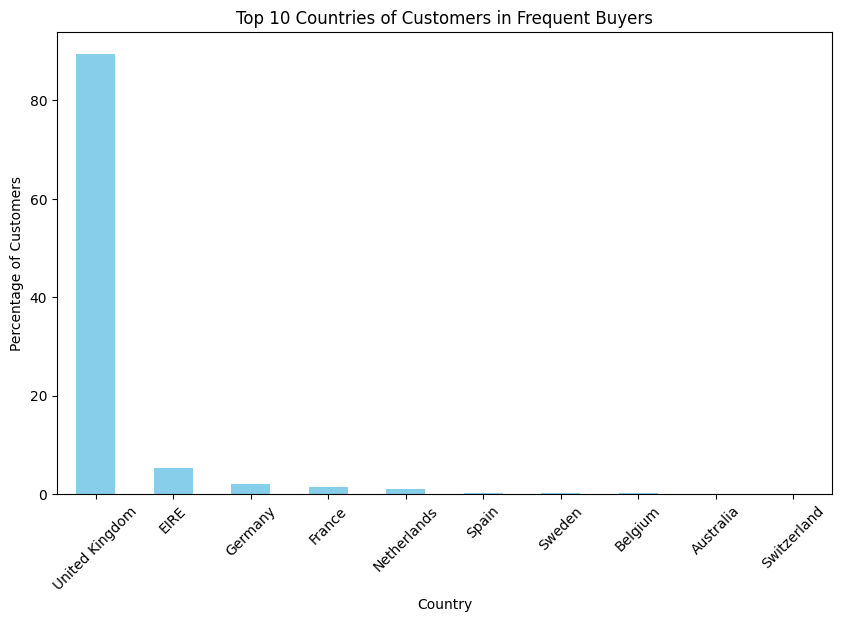

In [25]:
import matplotlib.pyplot as plt

# Function to create bar plots for the top 10 countries in a segment
def plot_top_countries(segment_distribution, segment_name):
    # Get the top 10 countries
    top_countries = segment_distribution.head(10)

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    top_countries.plot(kind='bar', color='skyblue')
    plt.xlabel('Country')
    plt.ylabel('Percentage of Customers')
    plt.title(f'Top 10 Countries of Customers in {segment_name}')
    plt.xticks(rotation=45)
    plt.show()

# Plot top 10 countries for each segment
plot_top_countries(frequent_buyers_geographic_distribution, 'Frequent Buyers')

- Frequent Buyers: The majority of frequent buyers are from the United Kingdom, followed by other countries like Germany, France, and EIRE. This suggests that the business has a strong customer base in the UK, with a significant presence in other European countries as well.

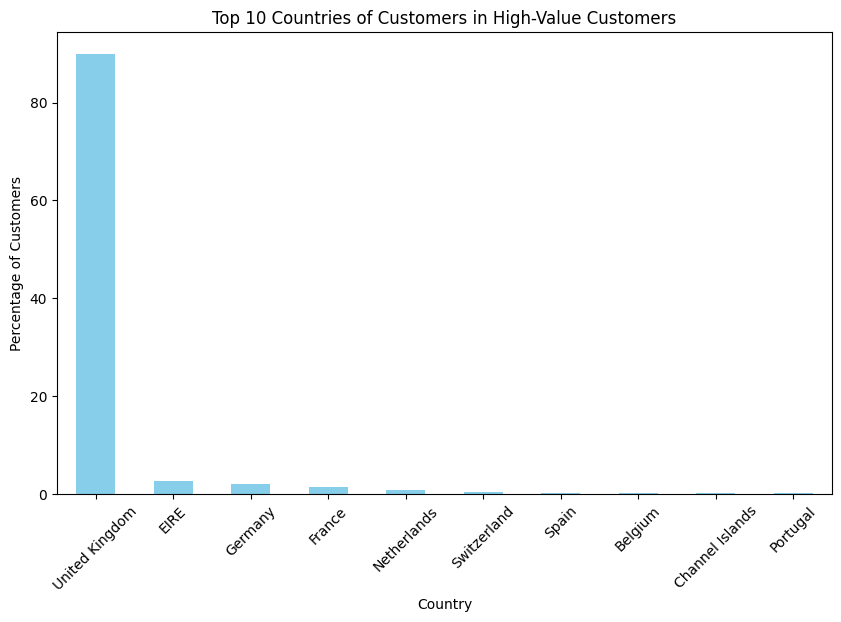

In [26]:
plot_top_countries(high_value_customers_geographic_distribution, 'High-Value Customers')

- High-Value Customers: Similar to frequent buyers, the top countries for high-value customers also include the United Kingdom, Germany, France, and EIRE. This indicates that the distribution of high-value customers closely mirrors that of frequent buyers.

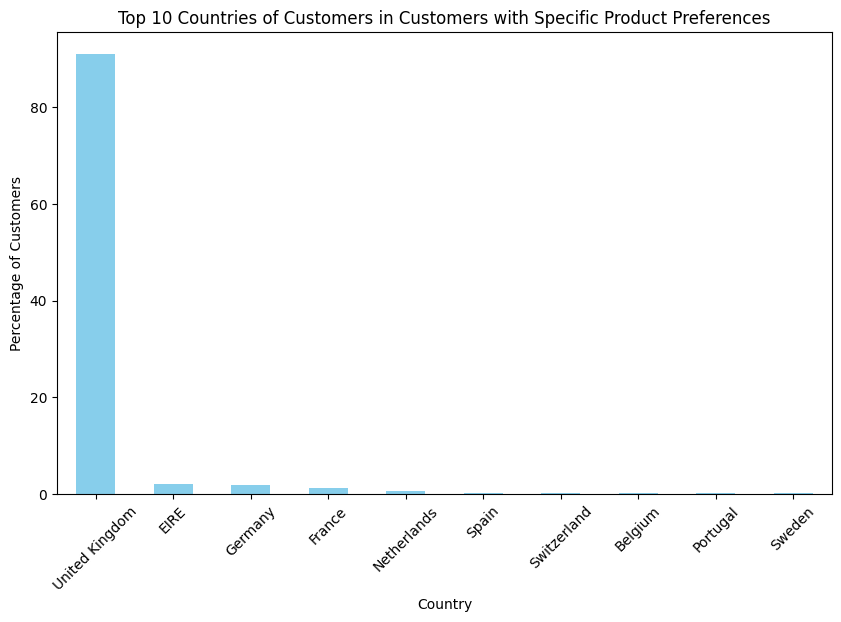

In [27]:
plot_top_countries(specific_product_customers_geographic_distribution, 'Customers with Specific Product Preferences')

- Customers with Specific Product Preferences: The distribution of customers with specific product preferences shows a slightly different pattern. While the UK still dominates, there is a more diverse distribution of customers across other countries like the Netherlands, Belgium, and Switzerland. This suggests that customers with specific product preferences may be more dispersed geographically compared to frequent buyers and high-value customers.

In [30]:
import folium
import geopandas as gpd

# Load the world map data from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Function to create an interactive map of geographic distribution for a given segment
def create_interactive_map(segment_distribution, segment_name):
    # Create a base map centered at a specific location (e.g., the world)
    m = folium.Map(location=[0, 0], zoom_start=2)

    # Add choropleth layer to the map
    folium.Choropleth(
        geo_data=world,
        data=segment_distribution,
        columns=['name', 'Country'],
        key_on='feature.properties.name',
        fill_color='YlGnBu',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'Geographic Distribution of Customers in {segment_name}',
    ).add_to(m)

    # Display the map
    return m


<ipython-input-30-a3c6536a743f>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [32]:
# Create interactive maps for each segment
frequent_buyers_map = create_interactive_map(frequent_buyers_geographic_distribution, 'Frequent Buyers')
high_value_customers_map = create_interactive_map(high_value_customers_geographic_distribution, 'High-Value Customers')
specific_product_customers_map = create_interactive_map(specific_product_customers_geographic_distribution, 'Customers with Specific Product Preferences')



In [33]:
frequent_buyers_map

In [34]:
specific_product_customers_map

In [35]:
high_value_customers_map

In [36]:
# Save the maps as HTML files or display them directly
frequent_buyers_map.save('frequent_buyers_map.html')
high_value_customers_map.save('high_value_customers_map.html')
specific_product_customers_map.save('specific_product_customers_map.html')

In [37]:
specific_product_customers.columns

Index(['Customer ID', 'PurchaseFrequency', 'TotalQuantityBought',
       'UniqueProductsBought', 'InvoiceDate', 'StockCode', 'Description',
       'Quantity', 'Price', 'Country', 'TotalPrice'],
      dtype='object')

 Analyze the overlap or intersection between different segments to identify customers who belong to multiple segments.

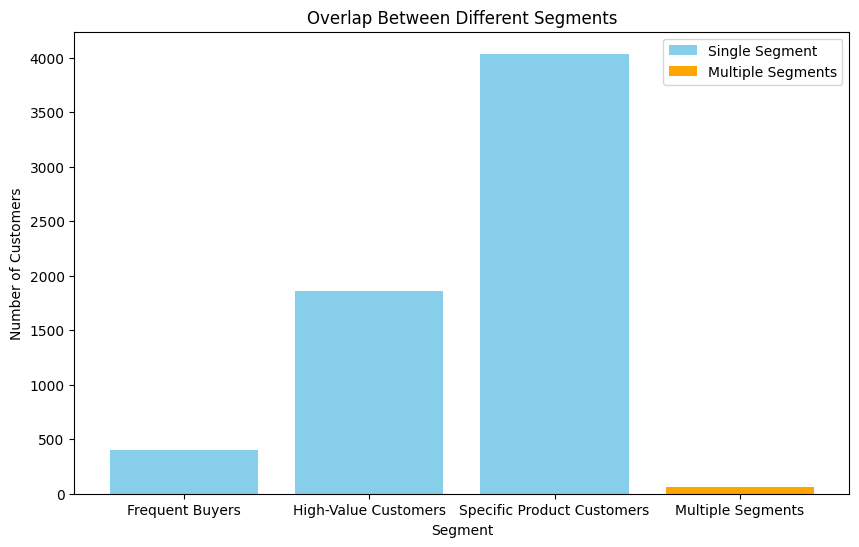

In [38]:
def analyze_segment_overlap(*segments, segment_names):
    """
    Analyze the overlap between different segments and identify customers who belong to multiple segments.

    Parameters:
    segments (DataFrame): Dataframes containing customer IDs for each segment.
    segment_names (list): List of names for each segment.

    Returns:
    None (displays a bar plot).
    """
    # Combine customer IDs from all segments into a single DataFrame
    all_customer_ids = pd.concat(segments, axis=1, ignore_index=True)
    all_customer_ids.columns = range(len(segments))

    # Count the number of customers in each segment
    segment_counts = all_customer_ids.apply(lambda x: x.nunique())

    # Calculate the number of customers who belong to multiple segments
    multi_segment_customers = all_customer_ids.drop_duplicates(keep=False)
    num_multi_segment_customers = len(multi_segment_customers)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(segment_counts)), segment_counts.values, color='skyblue', label='Single Segment')
    plt.bar(len(segments), num_multi_segment_customers, color='orange', label='Multiple Segments')
    plt.xlabel('Segment')
    plt.ylabel('Number of Customers')
    plt.title('Overlap Between Different Segments')
    plt.xticks(range(len(segments) + 1), segment_names + ['Multiple Segments'])
    plt.legend()
    plt.show()

# Call the function with the segments and segment names as arguments
analyze_segment_overlap(frequent_buyers['Customer ID'], high_value_customers['Customer ID'], specific_product_customers['Customer ID'], segment_names=['Frequent Buyers', 'High-Value Customers', 'Specific Product Customers'])

Explore differences in purchasing behavior and preferences between segments to understand how they contribute to overall revenue and profitability.

In [40]:
segments = {
    'Frequent Buyers': frequent_buyers,
    'High-Value Customers': high_value_customers,
    'Specific Product Customers': specific_product_customers
}

In [42]:
# Define the metrics you want to compare
metrics = ['PurchaseFrequency', 'TotalQuantityBought', 'UniqueProductsBought', 'TotalPrice']

# Initialize an empty dictionary to store segment comparisons
segment_comparison = {}

# Loop through each segment and calculate summary statistics for the specified metrics
for segment_name, segment_df in segments.items():
    segment_summary = segment_df[metrics].describe().transpose()
    segment_comparison[segment_name] = segment_summary


In [43]:
# Define the segments as a dictionary
segments = {
    'Frequent Buyers': frequent_buyers,
    'High-Value Customers': high_value_customers,
    'Specific Product Customers': specific_product_customers
}

# Initialize an empty dictionary to store segment comparisons
segment_comparison = {}

# Loop through each segment and calculate summary statistics for the specified metrics
for segment_name, segment_df in segments.items():
    segment_summary = segment_df[metrics].describe().transpose()
    segment_comparison[segment_name] = segment_summary


In [44]:
from scipy.stats import ttest_ind

# Conduct t-tests for each metric between segments
statistical_tests = {}

for metric in metrics:
    t_test_results = {}
    for segment_name1, segment_summary1 in segment_comparison.items():
        for segment_name2, segment_summary2 in segment_comparison.items():
            if segment_name1 != segment_name2:
                t_stat, p_value = ttest_ind(segment_summary1.loc[metric, 'mean'], segment_summary2.loc[metric, 'mean'])
                t_test_results[(segment_name1, segment_name2)] = {'t_statistic': t_stat, 'p_value': p_value}
    statistical_tests[metric] = t_test_results


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


In [45]:
# Create customer profiles based on purchasing behavior and preferences
customer_profiles = {}

for segment_name, segment_df in segments.items():
    segment_profile = segment_df.groupby('Customer ID')[metrics].mean()
    customer_profiles[segment_name] = segment_profile


In [46]:
# Calculate revenue metrics for each segment
revenue_metrics = {}

for segment_name, segment_df in segments.items():
    segment_revenue = segment_df['TotalPrice'].sum()
    segment_size = segment_df.shape[0]
    average_order_value = segment_revenue / segment_size
    revenue_metrics[segment_name] = {'TotalRevenue': segment_revenue, 'AverageOrderValue': average_order_value}


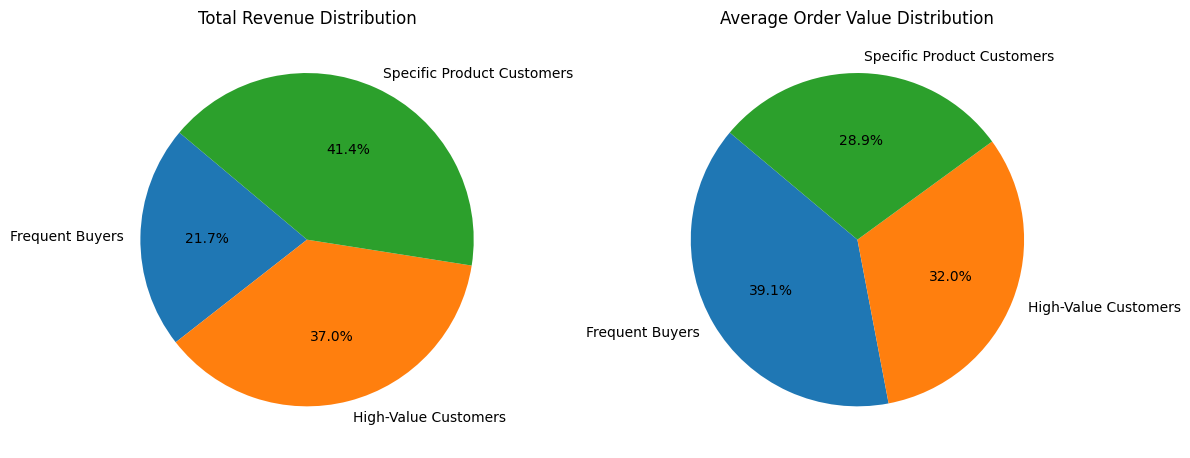

In [47]:
import matplotlib.pyplot as plt

def plot_pie_chart(revenue_metrics):
    labels = list(revenue_metrics.keys())
    total_revenues = [value['TotalRevenue'] for value in revenue_metrics.values()]
    avg_order_values = [value['AverageOrderValue'] for value in revenue_metrics.values()]

    # Plot pie chart for total revenue
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.pie(total_revenues, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Total Revenue Distribution')

    # Plot pie chart for average order value
    plt.subplot(1, 2, 2)
    plt.pie(avg_order_values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Average Order Value Distribution')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_pie_chart(revenue_metrics)


In [48]:
revenue_metrics

{'Frequent Buyers': {'TotalRevenue': 4551896.455999999,
  'AverageOrderValue': 28.939147928693128},
 'High-Value Customers': {'TotalRevenue': 7765419.420999999,
  'AverageOrderValue': 23.698324028466967},
 'Specific Product Customers': {'TotalRevenue': 8691719.393999996,
  'AverageOrderValue': 21.360036847990354}}

Based on the results obtained:

- Frequent Buyers: Generated a total revenue of approximately £4,551,896.46 with an average order value of £28.94.

- High-Value Customers: Achieved a total revenue of approximately £7,765,419.42 with a slightly lower average order value of £23.70.

- Specific Product Customers: Generated the highest total revenue among the segments, approximately £8,691,719.39, but with the lowest average order value of £21.36.

- Opportunities for Revenue Growth and Profitability Improvement:
Based on the analysis:

  - Frequent Buyers Segment: This segment generates a total revenue of approximately £4,551,896.46 with an average order value of £28.94. To further increase revenue and profitability, targeted marketing strategies could focus on encouraging repeat purchases or offering loyalty rewards to incentivize continued engagement.

  - High-Value Customers Segment: This segment contributes significantly to revenue, generating approximately £7,765,419.42, albeit with a slightly lower average order value of £23.70. Strategies to further capitalize on this segment's potential could involve personalized product recommendations or exclusive offers to maintain their high spending levels.

  - Specific Product Customers Segment: This segment generates the highest total revenue among the three segments, totaling approximately £8,691,719.39, with an average order value of £21.36. To maximize profitability, tailored marketing campaigns could highlight complementary products or accessories to encourage larger basket sizes and increase overall spending.

- Recommendations
    - Product Recommendations: Utilize personalized product recommendations based on past purchase behavior to encourage upselling or cross-selling, especially to high-value customers.

    - Pricing Optimization: Adjust pricing strategies to maximize revenue without compromising customer satisfaction. For instance, consider dynamic pricing based on customer segments and their willingness to pay.

    - Improving Average Order Value: Implement strategies to increase the average order value, such as bundling related products or offering discounts for bulk purchases.

    - Enhancing Customer Experience: Focus on delivering exceptional customer service and experience to encourage loyalty and repeat purchases across all segments.

By leveraging these strategies and insights gained from segment analysis, businesses can drive revenue growth and improve profitability effectively.